In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use("style.mplstyle")

In [2]:
X_TEST = "../UCI_HAR_Dataset/test/X_test.txt"
Y_TEST = "../UCI_HAR_Dataset/test/y_test.txt"
X_TRAIN = "../UCI_HAR_Dataset/train/X_train.txt"
Y_TRAIN = "../UCI_HAR_Dataset/train/y_train.txt"
PATHCOL = "../UCI_HAR_Dataset/features.txt"

USER_TEST = "../UCI_HAR_Dataset/test/subject_test.txt"
USER_TRAIN = "../UCI_HAR_Dataset/train/subject_train.txt"

In [3]:
df_train = pd.read_fwf(USER_TRAIN, header=None, widths=[2])
df_test = pd.read_fwf(USER_TEST, header=None, widths=[2])

el_train = pd.DataFrame(np.unique(df_train[0], return_counts=True)).T
el_test = pd.DataFrame(np.unique(df_test[0], return_counts=True)).T

print(f"mean: {np.mean(el_train[1])}, std: {np.std(el_train[1])}, min: {np.min(el_train[1])}, max: {np.max(el_train[1])}")
print(f"mean: {np.mean(el_test[1])}, std: {np.std(el_test[1])}, min: {np.min(el_test[1])}, max: {np.max(el_test[1])}")
print(f"train shape: {df_train.shape}, test shape: {df_test.shape}")


mean: 350.0952380952381, std: 34.74520146643721, min: 281, max: 409
mean: 327.44444444444446, std: 30.54363403799413, min: 288, max: 381
train shape: (7352, 1), test shape: (2947, 1)


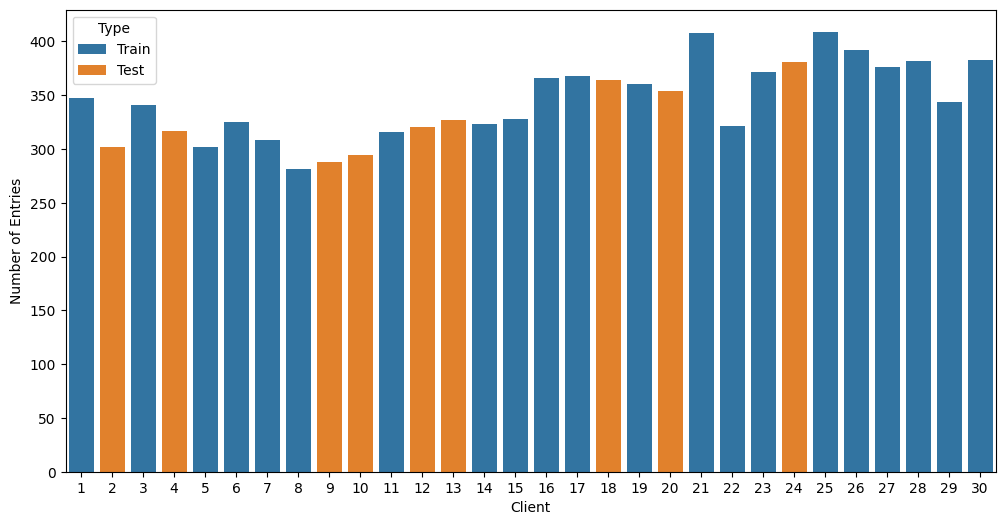

In [4]:
# PLOTTING USER DISTRIBUTION
el_train['Type'] = 'Train'
el_test['Type'] = 'Test'
combined = pd.concat([el_train, el_test])

combined = combined.sort_values(by=0)

plt.figure(figsize=(12, 6))
sns.barplot(combined, x=0, y=1, hue='Type')
plt.xlabel('Client')
plt.ylabel('Number of Entries')
plt.show()

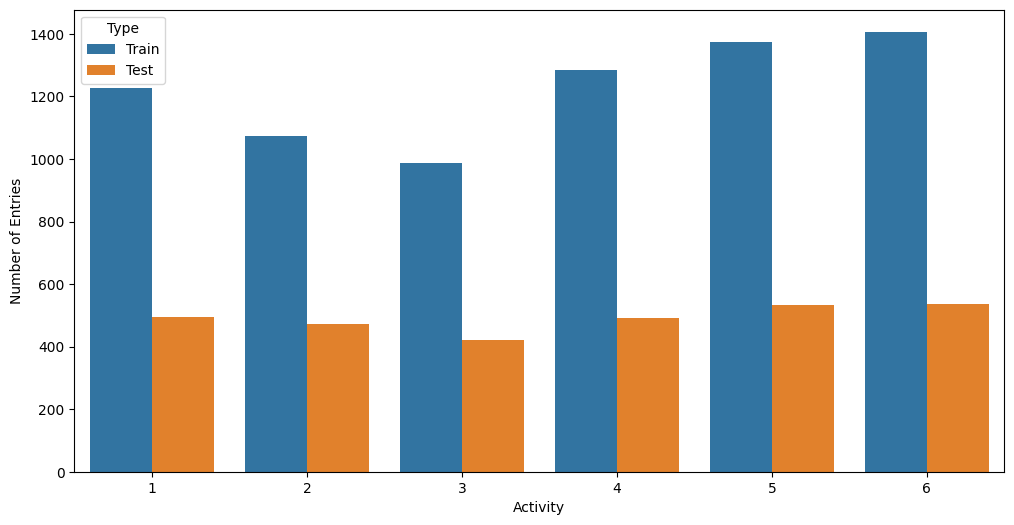

In [5]:
# PLOTTING ACTIVITY DISTRIBUTION
df_train = pd.read_fwf(Y_TRAIN, header=None, widths=[2])
df_test = pd.read_fwf(Y_TEST, header=None, widths=[2])

el_train = pd.DataFrame(np.unique(df_train[0], return_counts=True)).T
el_test = pd.DataFrame(np.unique(df_test[0], return_counts=True)).T

el_train['Type'] = 'Train'
el_test['Type'] = 'Test'
combined = pd.concat([el_train, el_test])

combined = combined.sort_values(by=0)

plt.figure(figsize=(12, 6))
sns.barplot(combined, x=0, y=1, hue='Type')
plt.xlabel('Activity')
plt.ylabel('Number of Entries')
plt.show()

---
I need to re-assemble the dataset

- ( (x_train + y_train + subject_train) + (x_test + y_test + subject_test) )
- shape: 10299 x 561

In [6]:
DF_X_TEST = pd.read_fwf(X_TEST, header=None)
DF_Y_TEST = pd.read_fwf(Y_TEST, header=None)
DF_X_TRAIN = pd.read_fwf(X_TRAIN, header=None)
DF_Y_TRAIN = pd.read_fwf(Y_TRAIN, header=None)
DF_PATHCOL = pd.read_fwf(PATHCOL, header=None)

DF_USER_TEST = pd.read_fwf(USER_TEST, header=None, widths=[2])
DF_USER_TRAIN = pd.read_fwf(USER_TRAIN, header=None, widths=[2])

In [7]:
print(f"DF_X_TEST: {DF_X_TEST.shape}, DF_Y_TEST: {DF_Y_TEST.shape}")
print(f"DF_X_TRAIN: {DF_X_TRAIN.shape}, DF_Y_TRAIN: {DF_Y_TRAIN.shape}")
print(f"DF_PATHCOL: {DF_PATHCOL.shape}")
print(f"DF_USER_TEST: {DF_USER_TEST.shape}, DF_USER_TRAIN: {DF_USER_TRAIN.shape}")

DF_X_TEST: (2947, 561), DF_Y_TEST: (2947, 1)
DF_X_TRAIN: (7352, 561), DF_Y_TRAIN: (7352, 1)
DF_PATHCOL: (561, 1)
DF_USER_TEST: (2947, 1), DF_USER_TRAIN: (7352, 1)


In [8]:
DF_TEST = pd.concat([DF_USER_TEST, DF_Y_TEST, DF_X_TEST], axis=1, ignore_index=True)
print(f"DF_TEST: {DF_TEST.shape}")
DF_TRAIN = pd.concat([DF_USER_TRAIN, DF_Y_TRAIN, DF_X_TRAIN], axis=1, ignore_index=True)
print(f"DF_TRAIN: {DF_TRAIN.shape}")
DF = pd.concat([DF_TRAIN, DF_TEST], axis=0, ignore_index=True)
print(f"DF: {DF.shape}")

DF_X_TRAIN_USER = pd.concat([DF_USER_TRAIN, DF_X_TRAIN], axis=1, ignore_index=True)
DF_X_TEST_USER = pd.concat([DF_USER_TEST, DF_X_TEST], axis=1, ignore_index=True)
DF_X = pd.concat([DF_X_TRAIN_USER, DF_X_TEST_USER], axis=0, ignore_index=True)
print(f"DF_X: {DF_X.shape}")
DF_Y = pd.concat([DF_Y_TRAIN, DF_Y_TEST], axis=0, ignore_index=True)
print(f"DF_Y: {DF_Y.shape}")

DF_TEST: (2947, 563)
DF_TRAIN: (7352, 563)
DF: (10299, 563)
DF_X: (10299, 562)
DF_Y: (10299, 1)


SOA : DF is the big dataframe with all the data (train + test + user)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
split.get_n_splits(DF_X, DF_Y)
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.3,
            train_size=None)


In [10]:
for i, (train_index, test_index) in enumerate(split.split(DF_X, DF_Y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, shape={len(train_index)}")
    print(f"  Test:  index={test_index}, shape={len(test_index)}")

Fold 0:
  Train: index=[4111 8040 7234 ... 1451 1307 8906], shape=7209
  Test:  index=[ 3086  7816  1851 ... 10224  7123 10240], shape=3090


devo fare stratified splitting ma devo stare attento perchè devo applicare la skill di "mantentere il rapporto" sia su y che su user

### STRATIFY ON Y (activity label)

X_train: (7209, 562), y_train: (7209, 1), X_test: (3090, 562), y_test: (3090, 1)
mean: 1201.5, std: 133.31760323878214, min: 984, max: 1361
mean: 515.0, std: 57.087651904768336, min: 422, max: 583
mean: 240.3, std: 24.726706210087908, min: 199, max: 287
mean: 103.0, std: 15.815604109022624, min: 73, max: 136


[Text(0.5, 0, 'Client'), Text(0, 0.5, 'Number of Entries')]

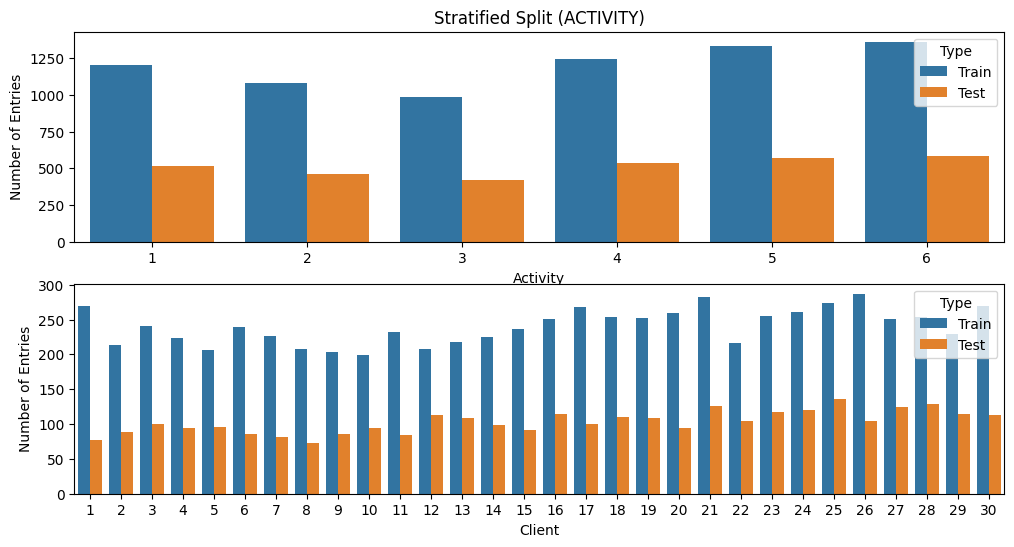

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DF_X, DF_Y, test_size=0.3, random_state=42, stratify=DF_Y)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

el_train_y = pd.DataFrame(np.unique(y_train[0], return_counts=True)).T
el_test_y = pd.DataFrame(np.unique(y_test[0], return_counts=True)).T

el_train_us = pd.DataFrame(np.unique(X_train[0], return_counts=True)).T
el_test_us = pd.DataFrame(np.unique(X_test[0], return_counts=True)).T

print(f"mean: {np.mean(el_train_y[1])}, std: {np.std(el_train_y[1])}, min: {np.min(el_train_y[1])}, max: {np.max(el_train_y[1])}")
print(f"mean: {np.mean(el_test_y[1])}, std: {np.std(el_test_y[1])}, min: {np.min(el_test_y[1])}, max: {np.max(el_test_y[1])}")

print(f"mean: {np.mean(el_train_us[1])}, std: {np.std(el_train_us[1])}, min: {np.min(el_train_us[1])}, max: {np.max(el_train_us[1])}")
print(f"mean: {np.mean(el_test_us[1])}, std: {np.std(el_test_us[1])}, min: {np.min(el_test_us[1])}, max: {np.max(el_test_us[1])}")


# PLOTTING ACTIVITY
el_train_y['Type'] = 'Train'
el_test_y['Type'] = 'Test'
combined = pd.concat([el_train_y, el_test_y])

combined = combined.sort_values(by=0)

fig, axs = plt.subplots(2, figsize=(12, 6))

# plt.figure(figsize=(12, 6))
plot1 = sns.barplot(combined, x=0, y=1, hue='Type', ax=axs[0])
plot1.set(xlabel='Activity', ylabel='Number of Entries', title="Stratified Split (ACTIVITY)")
# plt.xlabel('Activity')
# plt.ylabel('Number of Entries')
# plt.show()


# PLOTTING USER
el_train_us['Type'] = 'Train'
el_test_us['Type'] = 'Test'
combined = pd.concat([el_train_us, el_test_us])

combined = combined.sort_values(by=0)

# plt.figure(figsize=(12, 6))
plot2 = sns.barplot(combined, x=0, y=1, hue='Type', ax=axs[1])
plot2.set(xlabel='Client', ylabel='Number of Entries')
# plt.xlabel('Client')
# plt.ylabel('Number of Entries')
# plt.show()

In [26]:
# el_train = pd.DataFrame(np.unique(X_train[0], return_counts=True)).T
# el_test = pd.DataFrame(np.unique(X_test[0], return_counts=True)).T

# print(f"mean: {np.mean(el_train[1])}, std: {np.std(el_train[1])}, min: {np.min(el_train[1])}, max: {np.max(el_train[1])}")
# print(f"mean: {np.mean(el_test[1])}, std: {np.std(el_test[1])}, min: {np.min(el_test[1])}, max: {np.max(el_test[1])}")

# # PLOTTING
# el_train['Type'] = 'Train'
# el_test['Type'] = 'Test'
# combined = pd.concat([el_train, el_test])

# combined = combined.sort_values(by=0)

# plt.figure(figsize=(12, 6))
# sns.barplot(combined, x=0, y=1, hue='Type')
# plt.xlabel('Client')
# plt.ylabel('Number of Entries')
# plt.show()

### STRATIFY ON USER

X_train: (7209, 562), y_train: (7209, 1), X_test: (3090, 562), y_test: (3090, 1)
mean: 240.3, std: 24.45969473780625, min: 197, max: 286
mean: 103.0, std: 10.65520217233504, min: 84, max: 123
mean: 1201.5, std: 131.93274801958762, min: 1014, max: 1355
mean: 515.0, std: 65.12551983157857, min: 392, max: 598


[Text(0.5, 0, 'Client'), Text(0, 0.5, 'Number of Entries')]

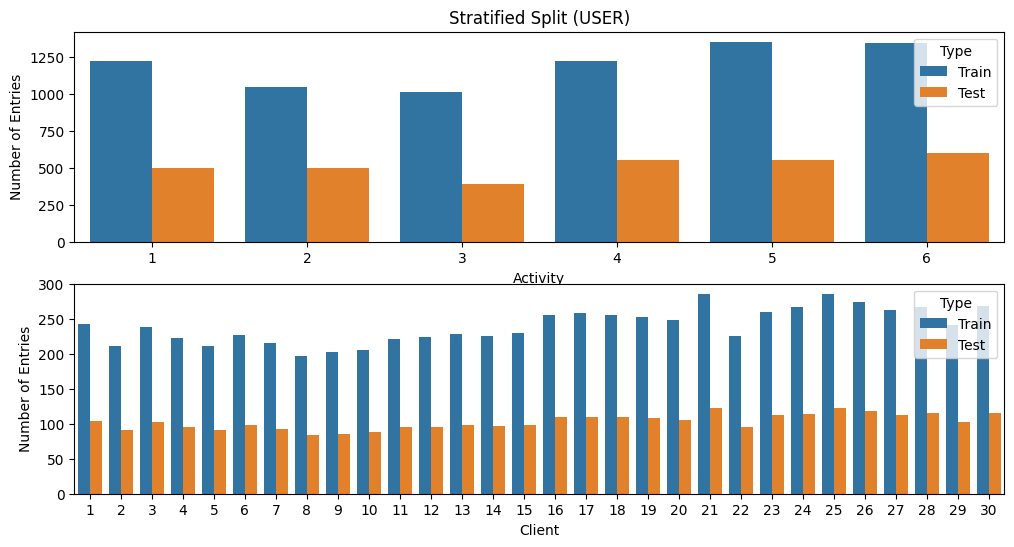

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DF_X, DF_Y, test_size=0.3, random_state=42, stratify=DF_X[0])
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

el_train_us = pd.DataFrame(np.unique(X_train[0], return_counts=True)).T
el_test_us = pd.DataFrame(np.unique(X_test[0], return_counts=True)).T

el_train_y = pd.DataFrame(np.unique(y_train[0], return_counts=True)).T
el_test_y = pd.DataFrame(np.unique(y_test[0], return_counts=True)).T

print(f"mean: {np.mean(el_train_us[1])}, std: {np.std(el_train_us[1])}, min: {np.min(el_train_us[1])}, max: {np.max(el_train_us[1])}")
print(f"mean: {np.mean(el_test_us[1])}, std: {np.std(el_test_us[1])}, min: {np.min(el_test_us[1])}, max: {np.max(el_test_us[1])}")

print(f"mean: {np.mean(el_train_y[1])}, std: {np.std(el_train_y[1])}, min: {np.min(el_train_y[1])}, max: {np.max(el_train_y[1])}")
print(f"mean: {np.mean(el_test_y[1])}, std: {np.std(el_test_y[1])}, min: {np.min(el_test_y[1])}, max: {np.max(el_test_y[1])}")


# PLOTTING ACTIVITY
el_train_y['Type'] = 'Train'
el_test_y['Type'] = 'Test'
combined = pd.concat([el_train_y, el_test_y])

combined = combined.sort_values(by=0)

fig, axs = plt.subplots(2, figsize=(12, 6))

# plt.figure(figsize=(12, 6))
plot3 = sns.barplot(combined, x=0, y=1, hue='Type', ax=axs[0])
plot3.set(xlabel='Activity', ylabel='Number of Entries',title="Stratified Split (USER)")
# plt.xlabel('Activity')
# plt.ylabel('Number of Entries')
# plt.show()


# PLOTTING USER
el_train_us['Type'] = 'Train'
el_test_us['Type'] = 'Test'
combined = pd.concat([el_train_us, el_test_us])

combined = combined.sort_values(by=0)

# plt.figure(figsize=(12, 6))
plot4 = sns.barplot(combined, x=0, y=1, hue='Type', ax=axs[1])
plot4.set(xlabel='Client', ylabel='Number of Entries')
# plt.xlabel('Client')
# plt.ylabel('Number of Entries')
# plt.show()

In [14]:
# el_train_y = pd.DataFrame(np.unique(y_train[0], return_counts=True)).T
# el_test_y = pd.DataFrame(np.unique(y_test[0], return_counts=True)).T

# print(f"mean: {np.mean(el_train_y[1])}, std: {np.std(el_train_y[1])}, min: {np.min(el_train_y[1])}, max: {np.max(el_train_y[1])}")
# print(f"mean: {np.mean(el_test_y[1])}, std: {np.std(el_test_y[1])}, min: {np.min(el_test_y[1])}, max: {np.max(el_test_y[1])}")

# # PLOTTING
# el_train_y['Type'] = 'Train'
# el_test_y['Type'] = 'Test'
# combined = pd.concat([el_train_y, el_test_y])

# combined = combined.sort_values(by=0)

# plt.figure(figsize=(12, 6))
# sns.barplot(combined, x=0, y=1, hue='Type')
# plt.xlabel('Activity')
# plt.ylabel('Number of Entries')
# plt.show()

estrapolo dal dataset 30-subdataset che rappresentano i dati raccolti di ogni utente (e di conseguenza le activities), su questi 30 applico lo stratified split prendendo come parametro di cui tenere la proporzione la mia y (quindi l'activity).
alla fine avrò 30 training set e 30 test set, divisi 70/30 e con lo stesso rapporto di activities, una volta predetto il valore calcolo accuracy e faccio la media delle accuracy.
corretto?

In [43]:
print(f"X -- head: {DF_X.head()}, shape: {DF_X.shape}")
print(f"Y -- head: {DF_Y.head()}, shape: {DF_Y.shape}")

X -- head:    0         1         2         3         4         5         6         7    \
0    1  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1    1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2    1  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3    1  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4    1  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        8         9    ...       552       553       554       555       556  \
0 -0.983185 -0.923527  ... -0.074323 -0.298676 -0.710304 -0.112754  0.030400   
1 -0.974914 -0.957686  ...  0.158075 -0.595051 -0.861499  0.053477 -0.007435   
2 -0.963668 -0.977469  ...  0.414503 -0.390748 -0.760104 -0.118559  0.177899   
3 -0.982750 -0.989302  ...  0.404573 -0.117290 -0.482845 -0.036788 -0.012892   
4 -0.979672 -0.990441  ...  0.087753 -0.351471 -0.699205  0.123320  0.122542   

        557       558      

In [44]:
# creare un array per ogni utente con l'index dell'activity all'interno di DF
# DF = CONCATENAZIONE DI X E Y
#
# DF[0] = USER
# DF[562] = ACTIVITY

DF = pd.concat([DF_X, DF_Y], axis=1, ignore_index=True)

print(f"user row = {np.unique(DF[0])}")
print(f"activity row = {np.unique(DF[562])}")